# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [1]:
# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [2]:
DATASET_PATH = '../data/college_student_placement_dataset.csv'
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [3]:
# Look at the first 5 lines of theraw contents of the file first.

with open(DATASET_PATH, 'r') as file:
    for line_number in range(5):
        if line := file.readline():
            print(line)
        else:
            break # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement

CLG0030,107,6.61,6.28,8,No,8,8,4,No

CLG0061,97,5.52,5.37,8,No,7,8,0,No

CLG0036,109,5.36,5.83,9,No,3,1,1,No

CLG0055,122,5.47,5.75,6,Yes,1,6,1,No



## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [4]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [5]:
# Identify which columns have null values. 
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [6]:
# Check to see if our data has any duplicate rows.
df.duplicated().sum()

0

Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [7]:
df.dtypes

College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object

In [8]:
df[['Internship_Experience','Placement']]

,Internship_Experience,Placement
0,No,No
1,No,No
2,No,No
3,Yes,No
4,No,No
...,...,...
9995,No,Yes
9996,No,No
9997,Yes,No
9998,No,No


## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [9]:
df['Internship_Experience'] = df['Internship_Experience'].replace({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].replace({'Yes': 1, 'No': 0})

C:\Users\Bagdo\AppData\Local\Temp\ipykernel_31504\3386702241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internship_Experience'] = df['Internship_Experience'].replace({'Yes': 1, 'No': 0})
C:\Users\Bagdo\AppData\Local\Temp\ipykernel_31504\3386702241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement'] = df['Placement'].replace({'Yes': 1, 'No': 0})


In [10]:
df.head(3)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

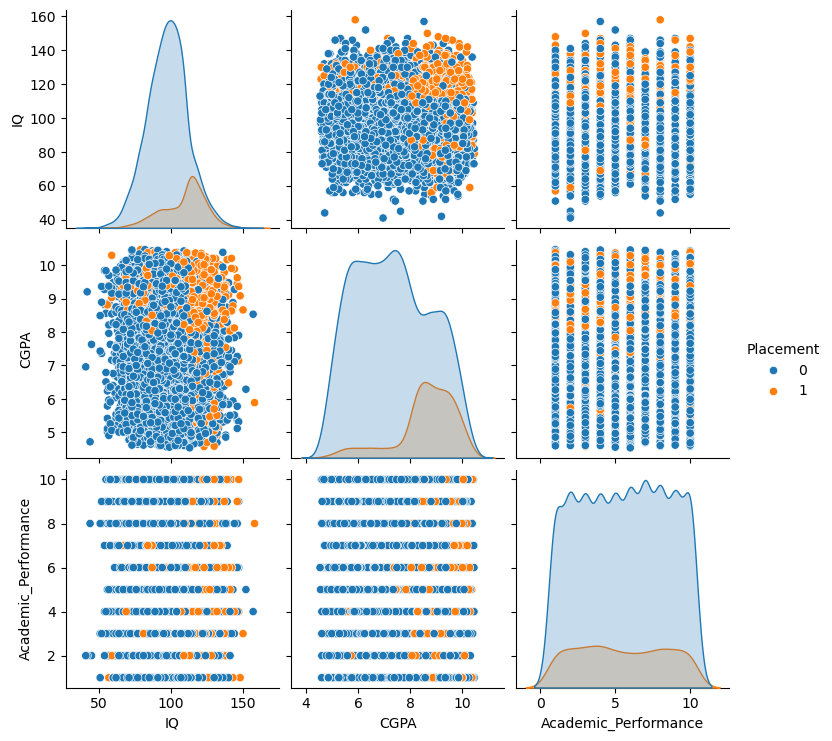

In [11]:
sns.pairplot(df[['IQ', 'CGPA', 'Academic_Performance', 'Placement']], 
             kind='scatter', diag_kind='kde', hue='Placement')
plt.show()


## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [12]:
# Set X to the desired features.
X  = df[['IQ','Internship_Experience']]
# Set y to be our target variable. 
y = df['Placement']

## Split to Testing and Training Datasets 

In [40]:
# Split our data into testing and training pairs.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Print the length and width of our testing data.
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows' % y_train.shape[0])
print('y_test: %d rows' % y_test.shape[0])

X_train: 8000 rows, 8 columns
X_test: 2000 rows, 8 columns
y_train: 8000 rows
y_test: 2000 rows


In [41]:
print(y_train.shape)
print(type(y_train))


(8000,)
<class 'pandas.core.series.Series'>


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [42]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [45]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)
print(y_pred[:10])

[1 0 0 0 1 0 0 0 0 1]


Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [46]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

Accuracy Score: 0.903500
Precision Score: 0.752852
Recall Score: 0.607362
F1 Score: 0.672326


Plot a confusion matrix of your predicted results.

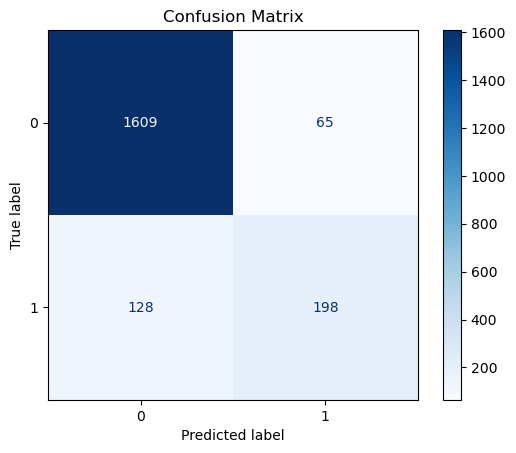

In [47]:
# 3. Plot a confusion matrix of your predicted results.

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

How many true positives and true negatives did your model get?

In [39]:
# How many true positives and true negatives did your model get?
cm = confusion_matrix(y_test, y_pred)

true_negatives, false_positives, false_negatives, true_positives = cm.ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 2412
True Positives: 286


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [25]:
import statsmodels.api as sm


X_sm = sm.add_constant(X)  


logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()


print(result.summary())


Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        23:15:03   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4077      0.224    -33.142      0.000      -7.846      -6.

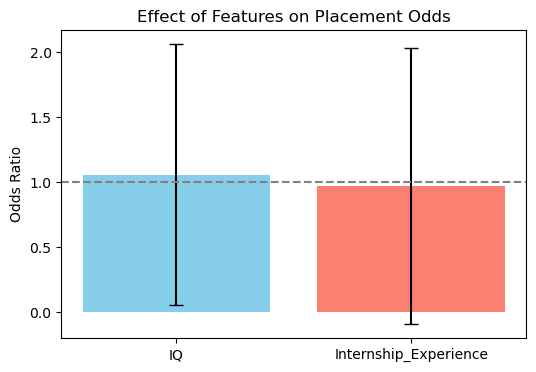

In [26]:
import matplotlib.pyplot as plt
import numpy as np

features = ['IQ', 'Internship_Experience']
odds_ratios = np.exp([0.0562, -0.0304])
errors = np.exp([0.002, 0.058])  # approximate for visualization

plt.figure(figsize=(6,4))
plt.bar(features, odds_ratios, yerr=errors, capsize=5, color=['skyblue','salmon'])
plt.axhline(1, color='gray', linestyle='--')
plt.ylabel("Odds Ratio")
plt.title("Effect of Features on Placement Odds")
plt.show()


OR = 1 → no effect

OR > 1 → positive effect

OR < 1 → negative effect


IQ is important but internship experience is not

# Extra Credit: Use your brain and make a better model (as in better scores).



In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# finding some good extra parameters
param_grid = {'C':[0.01,0.1,1,10,100], 'solver':['liblinear','lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=20, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_params_)


{'C': 0.1, 'solver': 'lbfgs'}


In [65]:
#new_feature
df["Performance_Improvement"] = df["CGPA"] - df["Prev_Sem_Result"]

In [78]:
# Define the new X variable, and reuse the same y variable from before.
X = df[['IQ','Prev_Sem_Result','CGPA','Internship_Experience',"Prev_Sem_Result",
        'Communication_Skills','Projects_Completed','Performance_Improvement']]

# Split our data into testing and training. Remember to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Accuracy Score: 0.903000
Precision Score: 0.746269
Recall Score: 0.613497
F1 Score: 0.673401


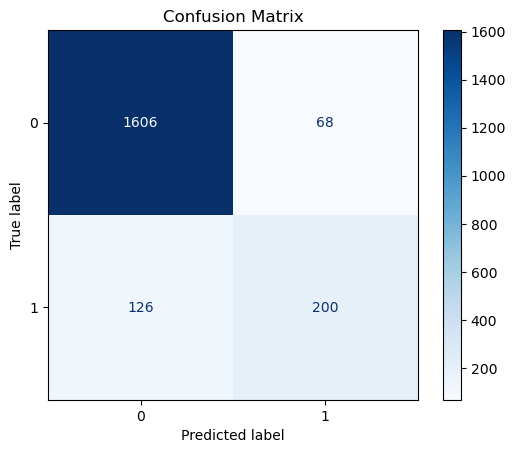

In [79]:
model = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000)
# Fit-train our model using our training data.
model.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred = model.predict(X_test)

# Print each of our scores to inspect performance.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)
# Plot the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [80]:
feature_names = X.columns

coefficients = model.coef_[0]

# Create DataFrame for better visualization
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Importance": np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

print("Top Features influencing Placement:")
print(feature_importance.head(10))

Top Features influencing Placement:
                   Feature  Coefficient  Absolute Importance
6       Projects_Completed     0.676658             0.676658
2                     CGPA     0.657153             0.657153
5     Communication_Skills     0.638954             0.638954
7  Performance_Improvement     0.376826             0.376826
1          Prev_Sem_Result     0.280328             0.280328
4          Prev_Sem_Result     0.280328             0.280328
0                       IQ     0.107095             0.107095
3    Internship_Experience     0.038366             0.038366


C:\Users\Bagdo\AppData\Local\Temp\ipykernel_31504\3600469279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


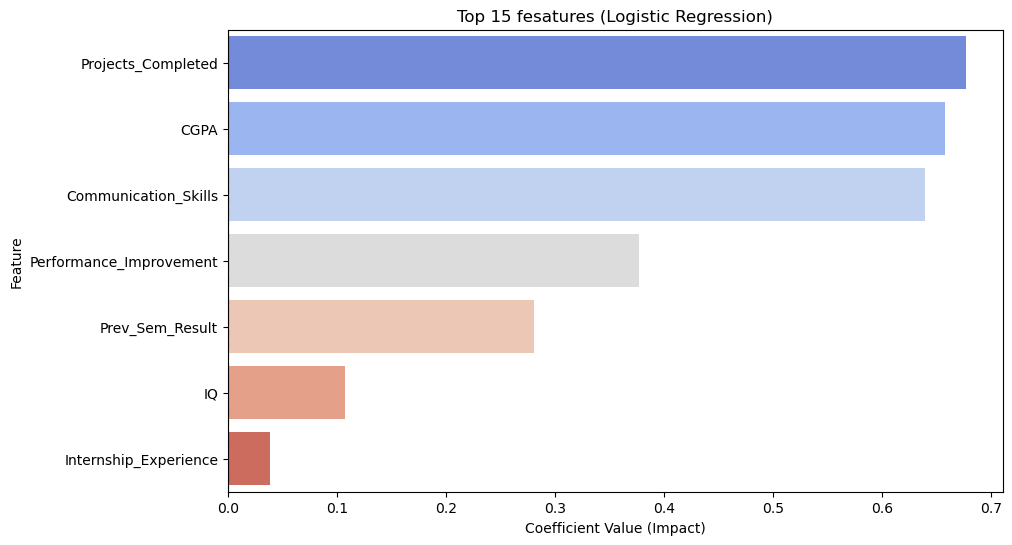

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Coefficient", 
    y="Feature", 
    data=feature_importance.head(15), 
    palette="coolwarm"
)
plt.title("Top 15 fesatures (Logistic Regression)")
plt.xlabel("Coefficient Value (Impact)")
plt.ylabel("Feature")
plt.axvline(0, color="black", linestyle="--")
plt.show()

In [ ]:
# fkf